# Age of Recomended system



The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

They are used to predict the rating or preference that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

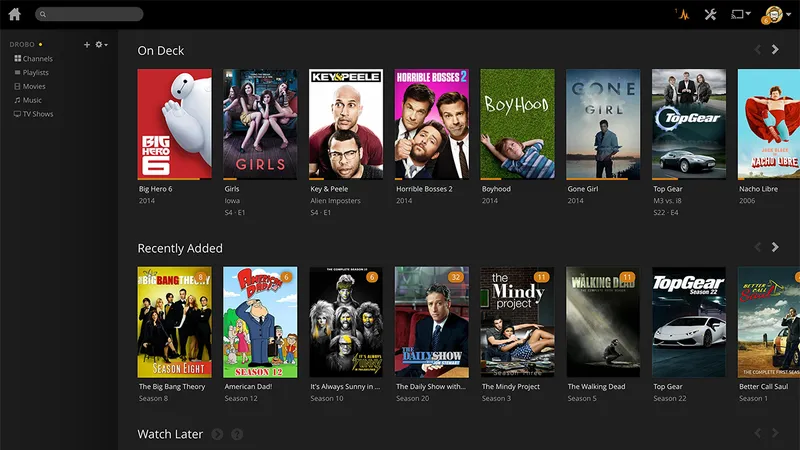


In this kernel we'll be building a baseline Movie Recommendation System using TMDB 5000 Movie Dataset. For novices like me this kernel will pretty much serve as a foundation in recommendation systems and will provide you with something to start with.
 


# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data Files

In [2]:
movies = pd.read_csv("C:\\ML\\movie\\movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv("C:\\ML\\movie\\ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [4]:
data=pd.merge(ratings,movies, how='left',on='movieId')
data.head()


,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [5]:
data.shape

(105339, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
 4   title      105339 non-null  object 
 5   genres     105339 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB


In [7]:
data.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [8]:
data.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


# Data visualization

In [9]:
df1 = data.groupby(['title'])[['rating']].sum()
high_rated = df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

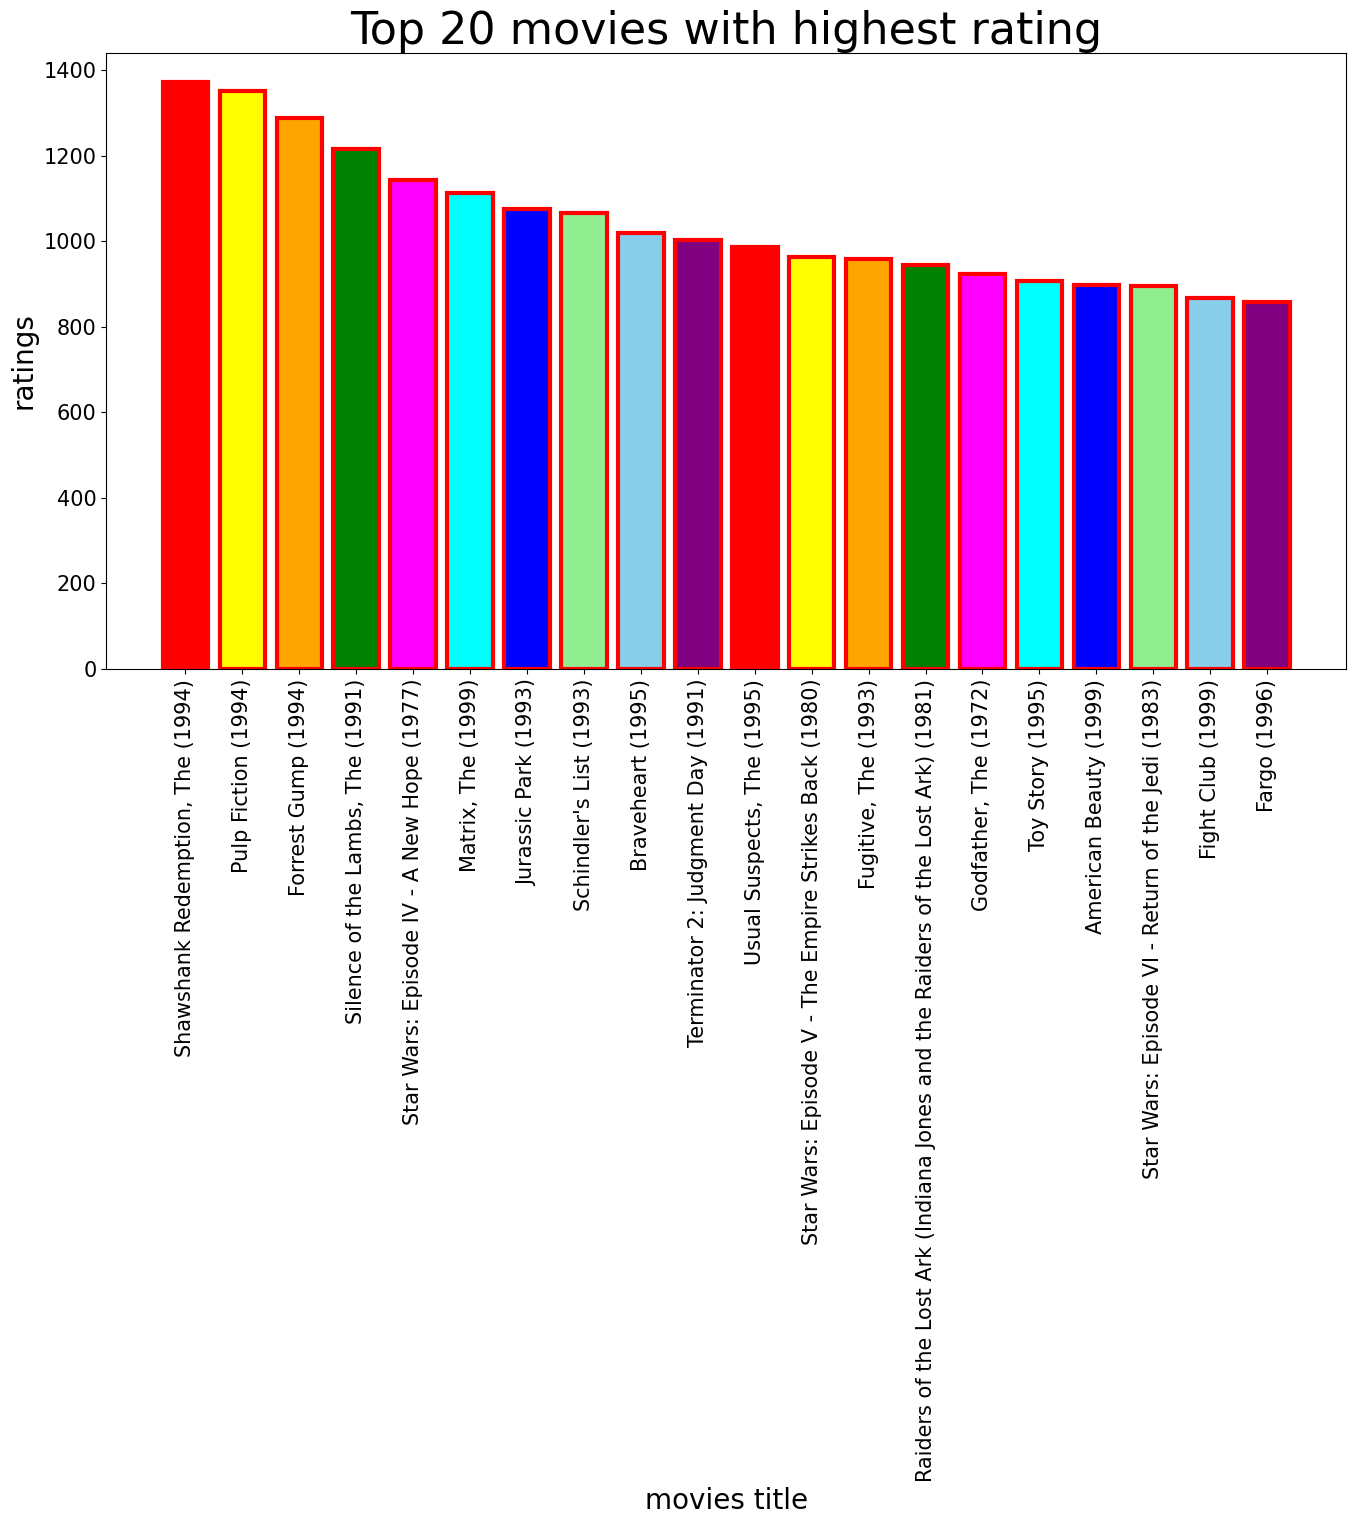

In [10]:
plt.figure(figsize=(16,8))
plt.title('Top 20 movies with highest rating',fontsize=32)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('movies title',fontsize=20)
plt.yticks(fontsize=15)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

In [11]:
df2=data.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

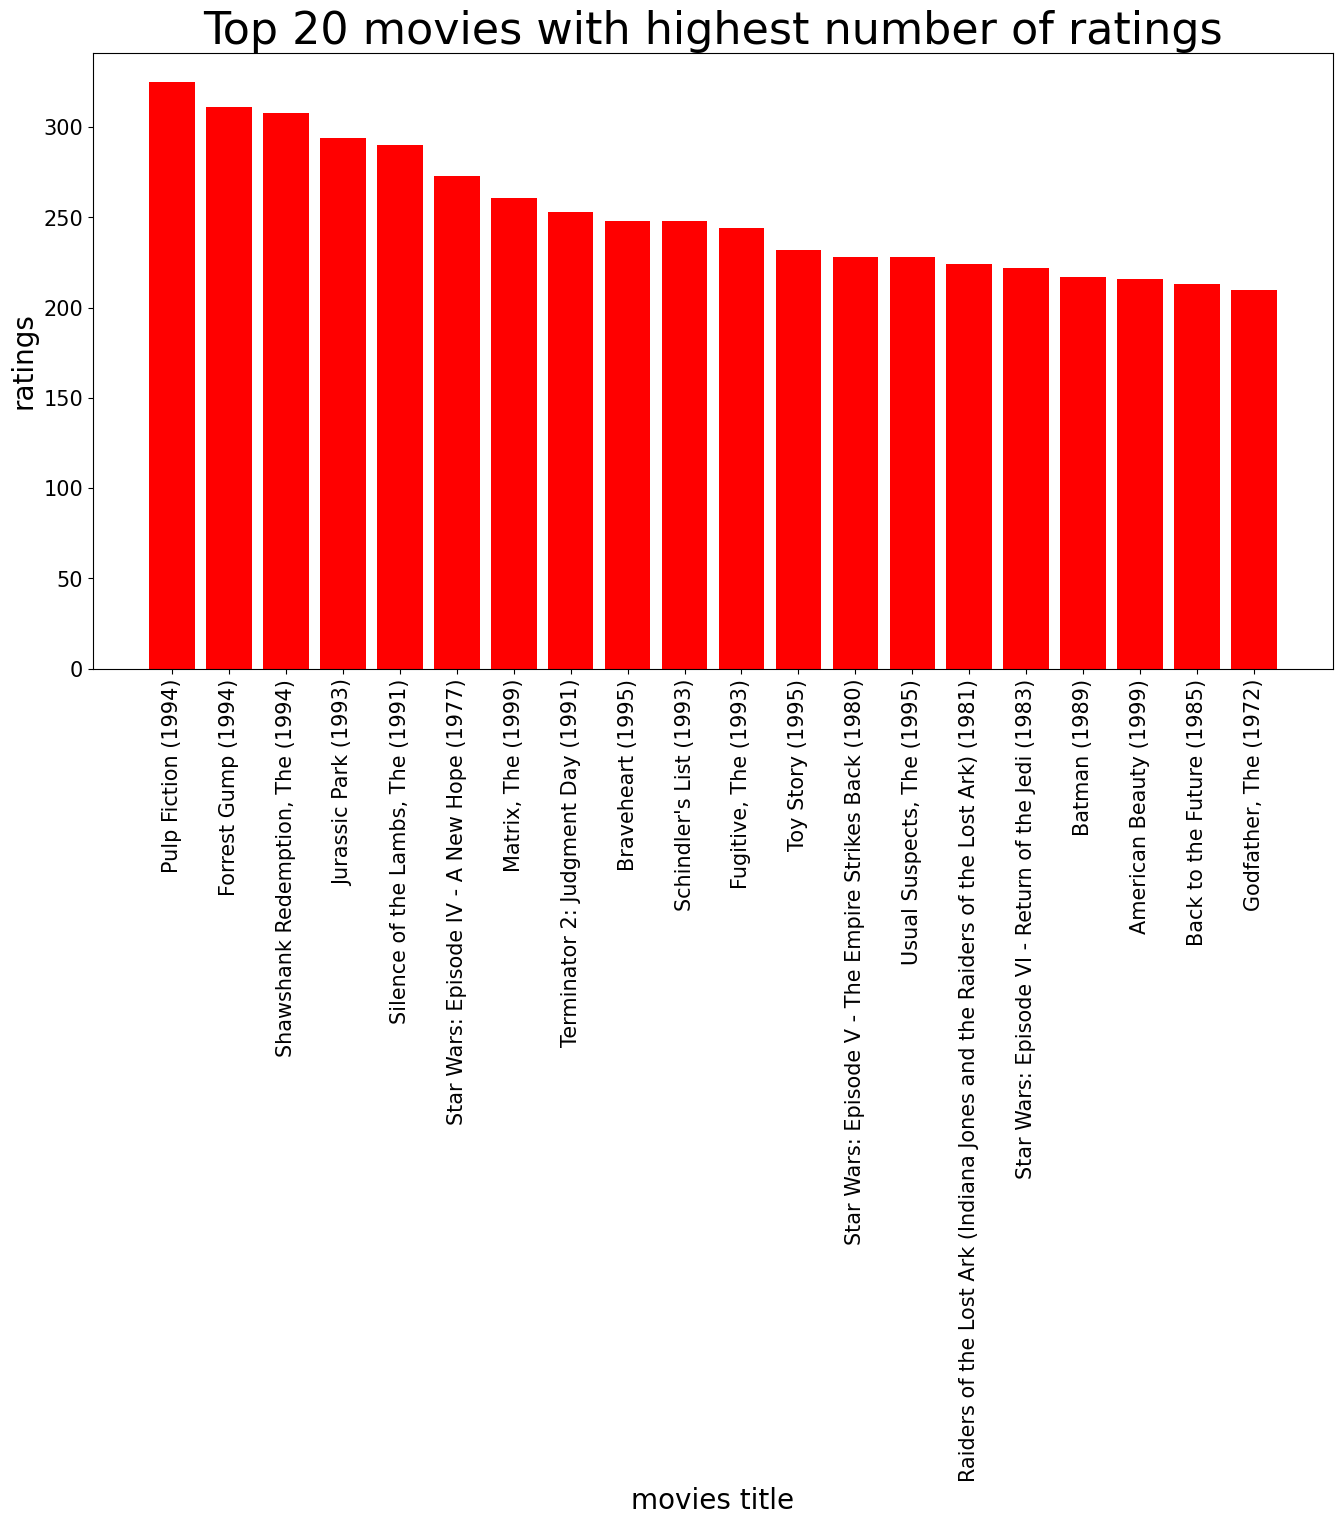

In [12]:
plt.figure(figsize=(16,8))
plt.title('Top 20 movies with highest number of ratings',fontsize=32)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('movies title',fontsize=20)
plt.ylabel('ratings',fontsize=20)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

In [13]:
imp = data['title']+','+data['genres']

In [14]:
data['imp'] = imp

In [15]:
data.head()

,userId,movieId,rating,timestamp,title,genres,imp
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,"Casino (1995),Crime|Drama"
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi,"Powder (1995),Drama|Sci-Fi"
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,"Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Myst..."
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"Seven (a.k.a. Se7en) (1995),Mystery|Thriller"
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"Usual Suspects, The (1995),Crime|Mystery|Thriller"


In [16]:
data['ids'] = [i for i in range(0,data.shape[0])]

In [17]:
data.head()

,userId,movieId,rating,timestamp,title,genres,imp,ids
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,"Casino (1995),Crime|Drama",0
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi,"Powder (1995),Drama|Sci-Fi",1
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,"Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Myst...",2
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"Seven (a.k.a. Se7en) (1995),Mystery|Thriller",3
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"Usual Suspects, The (1995),Crime|Mystery|Thriller",4


In [18]:
#get dummy variables
imp = pd.get_dummies(data['imp'])

In [19]:
imp

,"'71 (2014),Action|Drama|Thriller|War","'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy","'Round Midnight (1986),Drama|Musical","'Til There Was You (1997),Drama|Romance","'burbs, The (1989),Comedy","'night Mother (1986),Drama","(500) Days of Summer (2009),Comedy|Drama|Romance","*batteries not included (1987),Children|Comedy|Fantasy|Sci-Fi","...And Justice for All (1979),Drama|Thriller","10 (1979),Comedy|Romance",...,"[REC] (2007),Drama|Horror|Thriller","[REC]² (2009),Horror|Thriller","[REC]³ 3 Génesis (2012),Horror|Thriller","a/k/a Tommy Chong (2005),Documentary","eXistenZ (1999),Action|Sci-Fi|Thriller","loudQUIETloud: A Film About the Pixies (2006),Documentary","xXx (2002),Action|Crime|Thriller","xXx: State of the Union (2005),Action|Crime|Thriller","¡Three Amigos! (1986),Comedy|Western","À nous la liberté (Freedom for Us) (1931),Comedy|Musical"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
imp.dtypes

'71 (2014),Action|Drama|Thriller|War                                                   uint8
'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy    uint8
'Round Midnight (1986),Drama|Musical                                                   uint8
'Til There Was You (1997),Drama|Romance                                                uint8
'burbs, The (1989),Comedy                                                              uint8
                                                                                       ...  
loudQUIETloud: A Film About the Pixies (2006),Documentary                              uint8
xXx (2002),Action|Crime|Thriller                                                       uint8
xXx: State of the Union (2005),Action|Crime|Thriller                                   uint8
¡Three Amigos! (1986),Comedy|Western                                                   uint8
À nous la liberté (Freedom for Us) (1931),Comedy|Musical              

In [21]:
#Import TfIdfVectorizer from scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vecs = vec.fit_transform(imp)

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(vecs)

In [23]:
sim[100][100]

1.0000000000000002

In [24]:
sim.shape

(10325, 10325)

In [25]:
# Function that takes in movie title as input and outputs most similar movies
def recommend(title):
    movie_id =data[ data.title==title]['ids'].values[0]
    scores = list(enumerate(sim[movie_id]))
    sorted_scores = sorted(scores,key = lambda x:x[1],reverse=True)
    sorted_scores = sorted_scores[1:11]
    movies = [data[movies[0]==data['ids']]['title'].values[0] for movies in sorted_scores]
    return movies

In [26]:
for i in range(4):
    try:
        mv = pd.DataFrame(recommend(input('Enter Your Movie Name: ')))
        print(mv)
    except:
        print('pls enter valid details')
else:
    print('pls try again')

Enter Your Movie Name: Usual Suspects, The (1995)
                                                   0
0                           Kingdom of Heaven (2005)
1                             Black Hawk Down (2001)
2                                Rubin and Ed (1991)
3                                Crimson Peak (2015)
4                             Jennifer's Body (2009)
5                          Back to the Future (1985)
6                                Good Year, A (2006)
7                                  Abyss, The (1989)
8                         Tomorrow Never Dies (1997)
9  Fistful of Dollars, A (Per un pugno di dollari...
Enter Your Movie Name: casino 
pls enter valid details
Enter Your Movie Name: Casino (1995)
                                                   0
0                          Jingle All the Way (1996)
1                                 Others, The (2001)
2                  Back to the Future Part II (1989)
3                               Scary Movie 2 (2001)
4  Star Wa